# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: Lectures 2 and 3 

**Due date: Tuesday, May 24, 2022 at 18:00**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
### BEGIN SOLUTION
spotify_df = pd.read_csv("spotify.csv", index_col=0)
spotify_df.head()
### END SOLUTION

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

### BEGIN SOLUTION

In [4]:
len(df_train)

1512

In [5]:
len(df_test)

505

### END SOLUTION

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

### BEGIN SOLUTION

In [6]:
spotify_summary = df_train.describe()
spotify_summary

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.185337,0.617565,247606.240741,0.682022,0.139041,5.406746,0.189816,-7.089587,0.619048,0.090843,121.978905,3.964947,0.501758,0.511243
std,0.257866,0.163086,81841.143743,0.211498,0.279536,3.635880,0.154115,3.841885,0.485782,0.086574,27.121977,0.253555,0.246599,0.500039
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009460,0.512000,200072.000000,0.564000,0.000000,2.000000,0.092200,-8.389000,0.000000,0.037375,100.500750,4.000000,0.298750,0.000000
50%,0.063700,0.629500,230100.000000,0.713500,0.000076,6.000000,0.127000,-6.239000,1.000000,0.055050,121.974000,4.000000,0.501000,1.000000
75%,0.253000,0.738250,274041.750000,0.847250,0.061100,9.000000,0.243000,-4.756000,1.000000,0.107000,137.938250,4.000000,0.694000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
(spotify_summary.loc["max"] - spotify_summary.loc["min"]).sort_values()

speechiness              0.792900
danceability             0.862000
liveness                 0.950200
valence                  0.956100
instrumentalness         0.976000
energy                   0.982200
acousticness             0.994995
mode                     1.000000
target                   1.000000
time_signature           4.000000
key                     11.000000
loudness                32.790000
tempo                  171.472000
duration_ms         833918.000000
dtype: float64

It looks like **speechiness** has the smallest range.

### END SOLUTION

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [8]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

### BEGIN SOLUTION

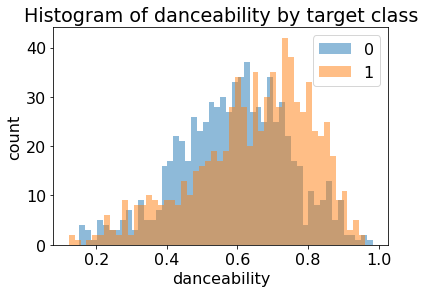

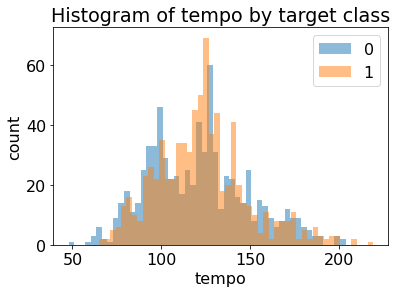

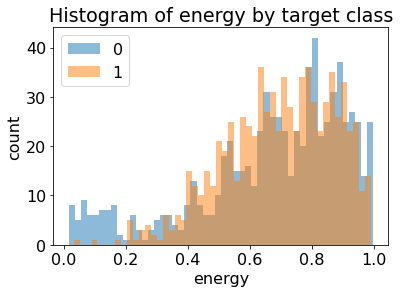

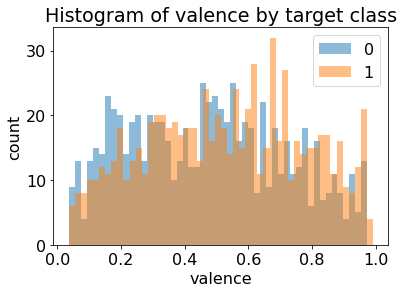

In [9]:
features = ["danceability", "tempo", "energy", "valence"]
figures = dict()

for feature in features:
    plt.hist(negative_examples[feature], alpha=0.5, bins=50, label="0")
    plt.hist(positive_examples[feature], alpha=0.5, bins=50, label="1")
    plt.legend(loc="best")

    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(f"Histogram of {feature} by target class")
    plt.show()

### END SOLUTION

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

### BEGIN SOLUTION

From the above, it looks like people may like songs with higher danceability; a reasonable split might be to predict $1$ if danceability is greater than $0.7$. 

Another reasonable split could be to predict $0$ if energy is less than around $0.2$.

### END SOLUTION

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

### BEGIN SOLUTION

No, the feature might still be useful, because it may be predictive in conjunction with other features. For example, the valence feature histograms (above) do indeed look quite overlapping. But it may be the case that very high valence in conjunction with low tempo is very predictive of a liked song. This type of pattern would not emerge in these individual histograms, but a decision tree could potentially still learn it.

### END SOLUTION

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [10]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

### BEGIN SOLUTION
The given features can definitely be useful in predicting whether the user liked the song or not. For example, the user can have a strong preference for an artist or a particular kind of songs, e.g., romantic songs. That said, free text columns are a bit tricky to use directly in your `X`; they need to be encoded in numbers so that we can use them in machine learning models. We'll learn how to do this later in this course. 

### END SOLUTION

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [11]:
### BEGIN SOLUTION
X_train = df_train.drop(columns=["target", "song_title", "artist"])
y_train = df_train["target"]

X_test = df_test.drop(columns=["target", "song_title", "artist"])
y_test = df_test["target"]

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
### END SOLUTION

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

### BEGIN SOLUTION

In [12]:
tree.predict(X_train.iloc[[0]])

array([0])

In [13]:
y_train.iloc[0]

0

Yes, the prediction is correct (they match).

### END SOLUTION

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [14]:
### BEGIN SOLUTION
cross_val_score(tree, X_train, y_train, cv=10).mean()
### END SOLUTION

0.6726254792610666

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

### BEGIN SOLUTION

In [15]:
cv_results = cross_validate(tree, X_train, y_train, cv=10, return_train_score=True)
cv_results["test_score"].mean()

0.6759628790519345

The score is slightly different. The randomness comes from the randomness in the decision tree algorithm. If we set the `random_state` parameter of `DecisionTreeClassifier` it would give us the same scores.  

In [16]:
cv_results["train_score"].mean()

0.9994121428880149

### END SOLUTION

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

### BEGIN SOLUTION
The training accuracy is much higher than the cross-validation accuracy suggesting that the model is overfit on the training data. 
### END SOLUTION

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

### BEGIN SOLUTION

In [17]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_score,train_score
0,0.019979,0.003328,0.657895,0.999265
1,0.018536,0.002107,0.638158,1.000000
2,0.016761,0.002257,0.695364,1.000000
3,0.018235,0.002395,0.675497,0.999265
4,0.017661,0.001937,0.655629,0.999265
5,0.015611,0.001805,0.701987,0.999265
6,0.015703,0.001844,0.701987,0.999265
7,0.016824,0.001748,0.662252,0.999265
8,0.015658,0.001886,0.655629,0.999265
9,0.015880,0.001844,0.715232,0.999265


The cv scores range from 0.62 to 0.74, so the range is fairly large. I would say I don't trust the 0.675 that much, certainly not to three or even two decimal places. I might say "around 0.64-0.7" or something like that.

### END SOLUTION

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

### BEGIN SOLUTION

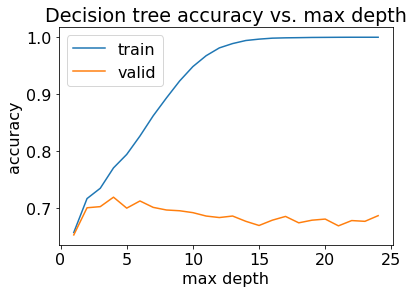

In [18]:
train_scores, cv_scores = [], []
max_depth = np.arange(1, 25, dtype=int)

for md in max_depth:
    # Prepare data for model fitting
    tree = DecisionTreeClassifier(max_depth=md)
    cv_results = cross_validate(tree, X_train, y_train, cv=10, return_train_score=True)
    train_score = cv_results["train_score"].mean()
    cv_score = cv_results["test_score"].mean()
    train_scores.append(train_score)
    cv_scores.append(cv_score)

plt.plot(max_depth, train_scores, label="train")
plt.plot(max_depth, cv_scores, label="valid")
plt.legend()
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("Decision tree accuracy vs. max depth");

In [19]:
best_depth = max_depth[np.argmax(cv_scores)]
print("Best depth:", best_depth)

Best depth: 4


In case of the training data, a higher value of `max_depth` parameter results in higher accuracy. For `max_depth >= 15` the accuracy is 1.0, which means that the model is able to classify all training examples perfectly. This happens because for higher `max_depth` values, the decision tree learns a specific rule for almost all examples in the training data. In case of the cross-validation scores, initially the accuracy increases a bit and then it goes back down. 

I would probably go with `max_depth = 4` because it has the best cross-validation score.

Whether the chosen depth generalizes to other users or not would depend upon how similar the new user is to this user. In other words, whether the training data for this user is representative of the new user or not. That said, the chosen depth of 4 would most like do better than if we had chosen a higher depth.  

### END SOLUTION

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

### BEGIN SOLUTION

Here was our cv score corresponding to `max_depth=4`:

In [20]:
np.max(cv_scores)

0.7189351690484489

In [21]:
tree = DecisionTreeClassifier(max_depth=best_depth)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7029702970297029

We see the test score is lower. So it's possible that we were being a bit optimistic. It is hard to say. But looking at the plot, we can see the cv score plot is quite "bumpy" and even if `max_depth=4` is a pretty good value, there is probably also some luck involved there.

### END SOLUTION

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

### BEGIN SOLUTION

1. Less than $5.5$ give us the first 3 examples. We'd predict $-1$ in this "true" case. For the last 3 exampless, we'd predict $+1$.
2. The accuracy would be 5/6.
3. No, it's not possible. For the first column, we have $+1$ labels with feature values smaller and larger than 5, so if we correctly classify the first example then we incorrectly classify something else. For the second column, we have $+1$ labels for feature values smaller and larger than $2$, so if we correctly classify the first example then we incorrectly classify something else. 

### END SOLUTION

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 